In [1]:
pip install matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


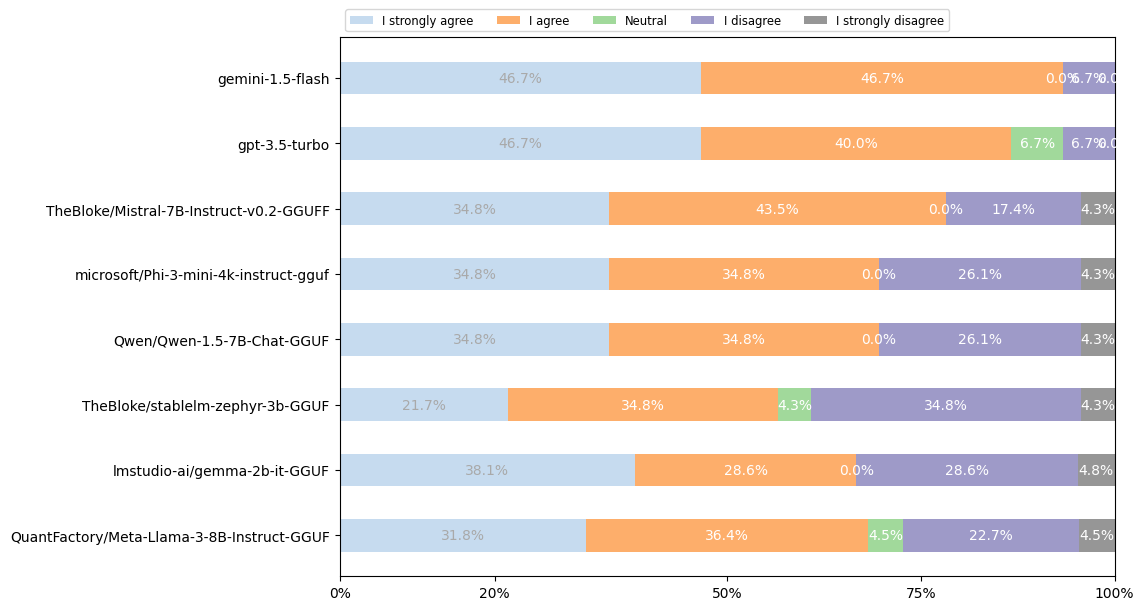

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the image
categories = [
    'gemini-1.5-flash', 'gpt-3.5-turbo', 'TheBloke/Mistral-7B-Instruct-v0.2-GGUFF', 
    'microsoft/Phi-3-mini-4k-instruct-gguf', 'Qwen/Qwen-1.5-7B-Chat-GGUF', 
    'TheBloke/stablelm-zephyr-3b-GGUF', 'lmstudio-ai/gemma-2b-it-GGUF', 
    'QuantFactory/Meta-Llama-3-8B-Instruct-GGUF'
]

values = [
    [7, 7, 0, 1, 0],  # gemini-1.5-flash
    [7, 6, 1, 1, 0],  # gpt-3.5-turbo
    [8, 10, 0, 4, 1],  # TheBloke/Mistral-7B-Instruct-v0.2-GGUFF
    [8, 8, 0, 6, 1],  # microsoft/Phi-3-mini-4k-instruct-gguf
    [8, 8, 0, 6, 1],  # Qwen/Qwen-1.5-7B-Chat-GGUF
    [5, 8, 1, 8, 1],  # TheBloke/stablelm-zephyr-3b-GGUF
    [8, 6, 0, 6, 1],  # lmstudio-ai/gemma-2b-it-GGUF
    [7, 8, 1, 5, 1]   # QuantFactory/Meta-Llama-3-8B-Instruct-GGUF
]

labels = ['I strongly agree', 'I agree', 'Neutral', 'I disagree', 'I strongly disagree']

# Function to create the bar chart with percentages and x-axis labels
def create_survey_chart_with_xaxis(categories, values, labels):
    data = np.array(values)
    row_sums = data.sum(axis=1)[:, np.newaxis]
    data_percent = data / row_sums * 100
    data_cum = data_percent.cumsum(axis=1)

    category_colors = plt.get_cmap('tab20c')(np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(True)
    ax.set_xlim(0, 100)
    ax.set_xticks([0, 20, 50, 75, 100])
    ax.set_xticklabels(['0%', '20%', '50%', '75%', '100%'])

    for i, (colname, color) in enumerate(zip(labels, category_colors)):
        widths = data_percent[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(categories, widths, left=starts, height=0.5, label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, f"{c:.1f}%", ha='center', va='center', color=text_color)
    
    ax.legend(ncol=len(labels), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')

    plt.show()

create_survey_chart_with_xaxis(categories, values, labels)
